<a href="https://colab.research.google.com/github/charithcherry/Innomatics_Internship_APR_21/blob/main/Recommender%20System/Music_Rec_Sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/musicdata/kaggle'


/content/drive/MyDrive/musicdata/kaggle


In [9]:
ls

kaggle_songs.txt                        MSDChallengeGettingstarted.pdf
kaggle_users.txt                        taste_profile_song_to_tracks.txt
kaggle_visible_evaluation_triplets.txt  unique_tracks.txt


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**VISIBLE EVALUTION TRIPLETS DATA**

In [11]:
triplets=pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])
triplets.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


**DATA DESCRIPTION**

In [12]:
triplets.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [13]:
triplets.shape

(1450933, 3)

In [14]:
triplets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1450933 non-null  object
 1   song_id  1450933 non-null  object
 2   freq     1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


**NULL and DUPLICATE VALUES**

In [15]:
triplets.isnull().sum()

user_id    0
song_id    0
freq       0
dtype: int64

In [16]:
sum(triplets.duplicated())

0

**UNIQUE TRACK DATA**

In [17]:
tracks_df=pd.read_csv('unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','artist_name','release'])
tracks_df.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [18]:
tracks_df.shape

(1000000, 4)

In [19]:
tracks_df.tail()

,track_id,song_id,artist_name,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


**NULL AND DUPLICATE VALUES**

In [20]:
print("Number of null values \n{}.".format(tracks_df.isnull().sum()))

Number of null values 
track_id        0
song_id         0
artist_name     0
release        15
dtype: int64.


In [21]:
print("Number of duplicate values {}".format(sum(tracks_df.duplicated())))

Number of duplicate values 0


In [22]:
detail_df=tracks_df.dropna()

In [23]:
detail_df.shape

(999985, 4)

In [24]:
print("Number of Null values are \n{}".format(tracks_df.isnull().sum()))

Number of Null values are 
track_id        0
song_id         0
artist_name     0
release        15
dtype: int64


#**MERGING DATAFRAMES**

In [25]:
song_df=pd.merge(triplets, tracks_df.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()


,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [26]:
song_df.shape

(1450933, 6)

#**Basic Statistics**

In [27]:
print('Total Data Points',song_df.shape[0])
print('Total NO of users',song_df['user_id'].unique().shape[0])
print('Total number of songs',song_df['song_id'].unique().shape[0])
print('Total number of Tracks',song_df['track_id'].unique().shape[0])


Total Data Points 1450933
Total NO of users 110000
Total number of songs 163206
Total number of Tracks 163206


In [28]:
print('Number of unique release',song_df['release'].unique().shape[0])
print('Number of unique artists',song_df['artist_name'].unique().shape[0])

Number of unique release 137623
Number of unique artists 28361


In [29]:
song_df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


# Distribution of Frequency column

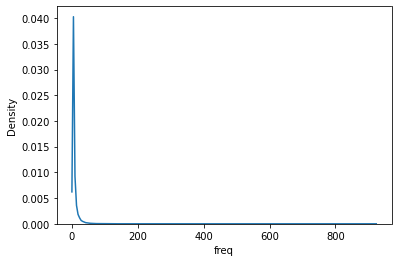

In [30]:
sns.kdeplot(data=song_df, x="freq")

# Number of songs listened per user

In [68]:
#groupby code
#using user_id,song_id
SPU=song_df.loc[:, ['user_id', 'song_id']]
songs_per_user=SPU.groupby('user_id').count()


In [69]:
songs_per_user

,song_id
user_id,
00007a02388c208ea7176479f6ae06f8224355b3,9
00014a76ed063e1a749171a253bca9d9a0ff1782,11
00015189668691680bb1a2e58afde1541ec92ced,17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
00020fcd8b01986a6a85b896ccde6c49f35142ad,32
...,...
fffdef71f13352e9cff769f1d96f5ccf90f8955e,7
fffe29116f96c97b47a5dabdd406784ad0ba6f30,6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17,23


In [71]:
songs_per_user.sort_values(by='song_id').head()

,song_id
user_id,
336c306c5df497a9cb4067c14d5b840ba1a1e272,5
47b83637c7726c40218552445e1dc9b906f0ad6d,5
5519a61514f2248435a70afad322568c1a1173eb,5
ae7a9eaf03f35908b8ffc420241f99e9c6057bf2,5
18cb5d68334667324a9bac0a66f6579f34f43a31,5


In [72]:
songs_per_user.sort_values(by='song_id').tail()

,song_id
user_id,
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,52
03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
d30e18323f15426c3cdc8585252ed34459916f51,52
7d90be8dfdbde170f036ce8a4b915440137cb11c,53


In [73]:
songs_per_user.describe()

,song_id
count,110000.000000
mean,13.190300
std,8.070827
min,5.000000
25%,7.000000
50%,11.000000
75%,17.000000
max,53.000000


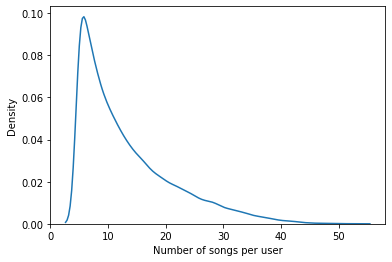

In [75]:
plt.xlabel('Number of songs per user')
sns.kdeplot(songs_per_user['song_id'])
plt.show()

# Analysis of popular artist

In [105]:
#group by
#artistname and userid
AP=song_df.loc[:, ['artist_name','freq', 'user_id']]

artist_popularity=AP.groupby('artist_name').count()



In [107]:
artist_popularity.sort_values(by='freq').head()

,freq,user_id
artist_name,,
Özlem Tekin,1,1
Chris Connelly and the Bells,1,1
Mad Professor / Mafia & Fluxy,1,1
Maddox Brothers & Rose,1,1
Madreblu,1,1


In [108]:
artist_popularity.sort_values(by='freq').tail()

,freq,user_id
artist_name,,
Jack Johnson,6784,6784
Justin Bieber,7669,7669
Florence + The Machine,8213,8213
Kings Of Leon,8514,8514
Coldplay,12279,12279


In [109]:
# looking at cold play releases
song_df[song_df['artist_name']=='Coldplay']['release'].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [110]:
# looking at justin beiber releases
song_df[song_df['artist_name']=='Justin Bieber']['release'].unique()

array(['Somebody To Love', 'Down To Earth', 'One Time', 'U Smile',
       'Favorite Girl', 'Love Me', 'Common Denominator',
       'Never Let You Go', 'Stuck In The Moment', 'Up',
       'One Less Lonely Girl', 'That Should Be Me', 'Bigger',
       'Runaway Love'], dtype=object)

In [111]:
sorted_artist_popularity=artist_popularity.sort_values(by='freq',ascending=False)

Text(0.5, 1.0, 'popularity and artist')

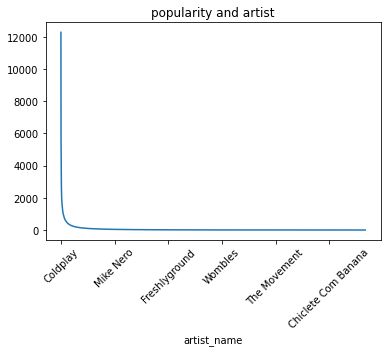

In [112]:
# plotting of popularity and artist

sorted_artist_popularity['freq'].plot.line()
plt.xticks(rotation=45)
plt.title('popularity and artist')

# Analysis of popularity song

In [123]:
# using release and userid
SP=song_df.loc[:, [ 'release','freq']]
song_popularity=SP.groupby('release').count()

In [124]:
song_popularity.sort_values(by='freq',ascending=True).head()

,freq
release,
Ef Ég Hefði Aldrei...,1
Making Love,1
Making Friends and Acquaintances,1
Making Flippy Floppy,1
Making Dens,1


In [126]:
song_popularity.sort_values(by='freq').tail()

,freq
release,
Revelry,3672
Dog Days Are Over (Radio Edit),3780
You're The One,4270
Undo,4483
Sehr kosmisch,5043


In [128]:
sorted_song_popularity=song_popularity.sort_values(by='freq',ascending=False)

In [129]:
# plot betweeen popularity and song

Text(0.5, 1.0, 'popularity and song')

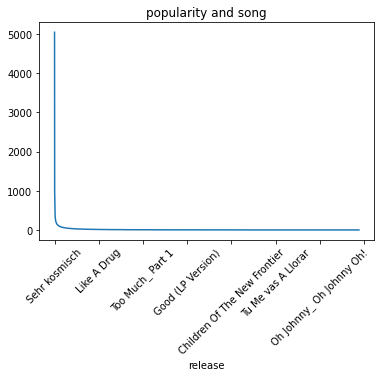

In [130]:
sorted_song_popularity['freq'].plot.line()
plt.xticks(rotation=45)
plt.title('popularity and song')

In [131]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [132]:
repeated=song_df.groupby(['freq'])['song_id'].value_counts()

In [134]:
repeated

freq  song_id           
1     SOFRQTD12A81C233C0    2149
      SOAXGDH12A8C13F8A1    1693
      SOAUWYT12A81C206F1    1597
      SONYKOW12AB01849C9    1517
      SOSXLTC12AF72A7F54    1516
                            ... 
537   SOFVLYV12A8C145D8F       1
582   SONGOJV12AF729AEBD       1
597   SOAOXTG12A67021AA7       1
646   SOPMHHE12AB01845F6       1
923   SOXTUWG12AB018A2E2       1
Name: song_id, Length: 406254, dtype: int64

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 <a list of 11 Text major ticklabel objects>)

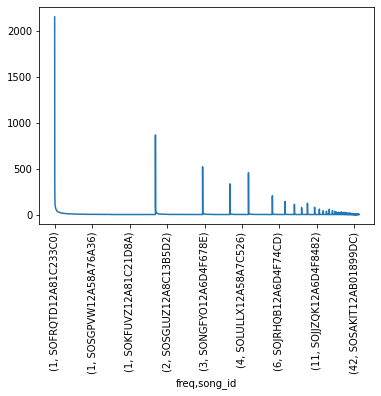

In [135]:
repeated.plot.line()
plt.xticks(rotation=90)

In [136]:
repeated.dtype

dtype('int64')

In [137]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [138]:
song_grouped=song_df.groupby(['release']).agg({'freq':'count'}).reset_index()

In [139]:
song_grouped.head()

,release,freq
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2


In [140]:
grouped_sum=song_grouped['freq'].sum()
song_grouped['percentage']=(song_grouped['freq']/grouped_sum)*100
song_grouped.sort_values(['freq','release'],ascending=[0,1])

,release,freq,percentage
98812,Sehr kosmisch,5043,0.347570
125393,Undo,4483,0.308974
136066,You're The One,4270,0.294294
28716,Dog Days Are Over (Radio Edit),3780,0.260522
93984,Revelry,3672,0.253079
...,...,...,...
137608,Último Desejo,1,0.000069
137610,Über Grenzen Geh'n,1,0.000069
137612,Übers Geld (Skit),1,0.000069
137614,Üdvözöl A Pokol,1,0.000069


#**NEW DATAFRAME**

In [147]:
songDet=song_df.head(10000)

#**POPULARITY RECOMMENDER SYSTEM**



In [148]:
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

In [149]:
pr=popularity_recommender_py()

In [151]:
pr.create(songDet,'user_id','release')

In [152]:
pr.recommend(songDet['user_id'][5])

,user_id,release,score,Rank
7113,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,You're The One,40,1.0
6524,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Undo,38,2.0
5089,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Sehr kosmisch,36,3.0
4814,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Revelry,32,4.0
1468,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Dog Days Are Over (Radio Edit),29,5.0
650,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Billionaire [feat. Bruno Mars] (Explicit Albu...,24,6.0
1581,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Drop The World,22,7.0
1934,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Fireflies,22,8.0
2581,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Horn Concerto No. 4 in E flat K495: II. Romanc...,22,9.0
4799,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Représente,20,10.0


#**Item Similarity Recommendation**

In [161]:
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [174]:
ir = item_similarity_recommender_py()
ir.create(songDet, 'user_id', 'release')

In [175]:
user_items = ir.get_user_items(songDet['user_id'][5])

In [176]:
# display user songs history
for user_item in user_items:
    print(user_item)

You're The One
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)
Tive Sim
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)
El Cuatrero
Unite (2009 Digital Remaster)


In [177]:
# give song recommendation for that user
ir.recommend(songDet['user_id'][5])



No. of unique songs for the user: 6
no. of unique songs in the training set: 7183
Non zero values in cooccurence_matrix :1403


,user_id,song,score,rank
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Représente,0.068740,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Revelry,0.067948,2
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Sayonara-Nostalgia,0.066639,3
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Undo,0.064033,4
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Secrets,0.060982,5
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Rianna,0.052746,6
6,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Gears,0.043940,7
7,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,The Gift,0.043168,8
8,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Invalid,0.042351,9
9,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,16 Candles,0.041779,10


In [178]:
ir.get_similar_items(['Oliver James - Fleet Foxes', 'The End - Pearl Jam'])


no. of unique songs in the training set: 7183
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Moving To New York (album version),0.0,1
1,,Revolver [feat. Lil Wayne],0.0,2
2,,Bring Da Ruckus,0.0,3
3,,Words I Manifest (Remix) (Explicit),0.0,4
4,,The ? Remainz (Explicit),0.0,5
5,,Soliloquy Of Chaos (Explicit),0.0,6
6,,Ex-Girl To Next Girl (Explicit),0.0,7
7,,Above The Clouds (Edited),0.0,8
8,,Space Hos,0.0,9
9,,Gotta Get Over (Taking Loot) (Explicit),0.0,10
